In [13]:
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import (ggplot, 
                      aes,
                      geom_line,
                      theme_bw,
                      geom_histogram,
                      scale_x_log10,
                      scale_x_sqrt)
from plotnine_prism import theme_prism
from collections import namedtuple, defaultdict
import numpy as np
from datetime import datetime
from bisect import bisect_left, bisect_right
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20}, style="whitegrid")  

In [3]:
TableConfig = namedtuple("TableConfig", "tname author body utc subforum")

In [4]:
PlotConfig = namedtuple("PlotConfig", "hist_log hist2_log max_hist2")

In [5]:
reddit_config = TableConfig("reddit", "author", "body", "created_utc", "subreddit")
dread_config = TableConfig("dread", "creator", "content", "created_on", "board")

In [16]:
def basic_stats(conn: duckdb.DuckDBPyConnection, tconfig: TableConfig, pconfig: PlotConfig):
   #q = duckdb.sql(f"SELECT * FROM {tconfig.tname} LIMIT 1",
   #               connection=conn)    
   #print(q.fetchall())
   ### n_authors
   results = defaultdict(dict)
   n_auth = duckdb.sql(f"SELECT COUNT(*) FROM {tconfig.tname}",
                       connection=conn).fetchone()
   print("Num authors: ", n_auth[0])
   post_counts = duckdb.sql(f"SELECT len({tconfig.utc}) FROM {tconfig.tname}", connection=conn).fetchall()
   post_counts = np.array(post_counts).flatten()
   n_posts = post_counts.sum()
   print("Num Posts: ", n_posts)

   # Posts per author histogram:
   df = pd.DataFrame({"n_post": post_counts})
   fig, ax = plt.subplots()
   plot = sns.ecdfplot(
      data=df, x="n_post", 
      log_scale=pconfig.hist_log,
      ax=ax
   )
   results["plots"]["n_post_cdf"] = (plot, fig, ax)

   subredditwise_counts = duckdb.sql(f"SELECT {tconfig.subforum}, COUNT(*) AS n_posts FROM \
                                      (SELECT UNNEST({tconfig.subforum}) AS {tconfig.subforum} FROM {tconfig.tname}) \
                                       GROUP BY {tconfig.subforum}",
                                     connection=conn).fetchall()
   results["dicts"]["subforum_posts"] = subredditwise_counts   

   total_subreddits = duckdb.sql(f"SELECT COUNT(DISTINCT({tconfig.subforum})) FROM \
                                   (SELECT UNNEST({tconfig.subforum}) AS {tconfig.subforum} FROM {tconfig.tname})", connection=conn).fetchone()
   print("Total subforums: ", total_subreddits[0])

   n_subreddit_per_author = duckdb.sql(f"SELECT {tconfig.author}, list_unique({tconfig.subforum}) FROM {tconfig.tname}", connection=conn).fetchall()
   n_sub_arr = np.array([t[1] for t in n_subreddit_per_author], dtype=np.int32)

   print(f"Authors with n_subforum above thresh (>= {pconfig.max_hist2}): ", 
         [(auth, count) for auth, count in n_subreddit_per_author if count >= pconfig.max_hist2])
   plot_subforums = n_sub_arr[n_sub_arr < pconfig.max_hist2]
   df = pd.DataFrame({"n_subforum": plot_subforums})
   fig, ax = plt.subplots()
   plot_2 = sns.histplot(
      data=df, x="n_subforum",
      discrete=True,
      log_scale=pconfig.hist2_log,
      ax=ax
   )
   results["plots"]["n_subforums"] = (plot_2, fig, ax)

   return results

***

## Dread

Num authors:  44631
Num Posts:  294596
Total subforums:  382
Authors with n_subforum above thresh (>= 50):  [('adruguser', 66), ('BonesKoopa', 60), ('[deleted]', 139), ('encrypt', 55), ('enthusiast_of_lsd', 62), ('MJA20WithA3', 77), ('NoOneHear', 52), ('PelicanVendor', 50), ('Witchman05 M', 72)]


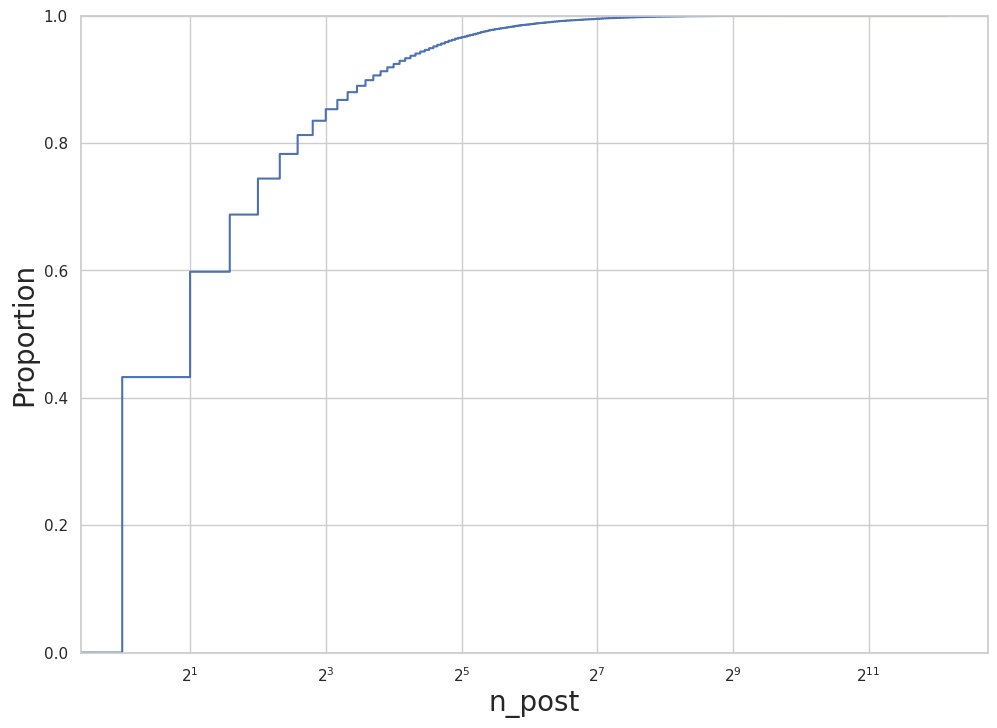

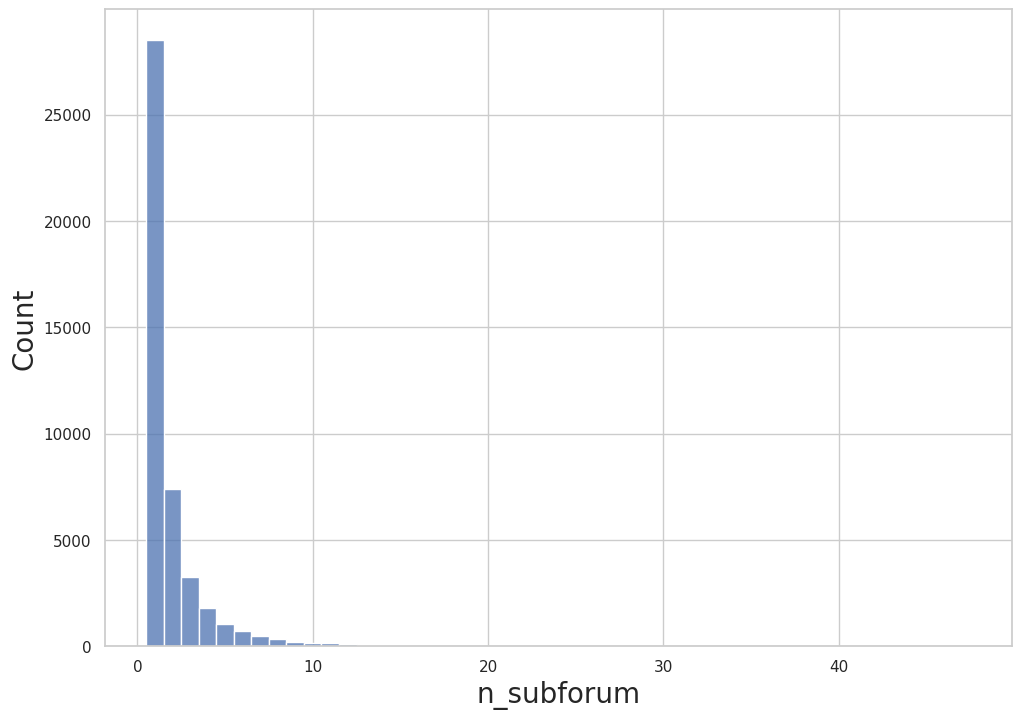

In [18]:
table = duckdb.read_json("/data/ccc/data/dread_all.jsonl")
conn = duckdb.register("dread", table)
plot_config = PlotConfig(2, False, 50)
outputs = basic_stats(conn, dread_config, plot_config)

***
## The Hub

Num authors:  8243
Num Posts:  88753
Total subforums:  62
Authors with n_subforum above thresh (>= 30):  [('Alfred', 32), ('Allegiance', 30), ('BonesKoopa', 36), ('EvilGrin', 32), ('Jack Harkness', 30), ('None', 42), ('PaperChase', 31), ('xyzzz', 36)]


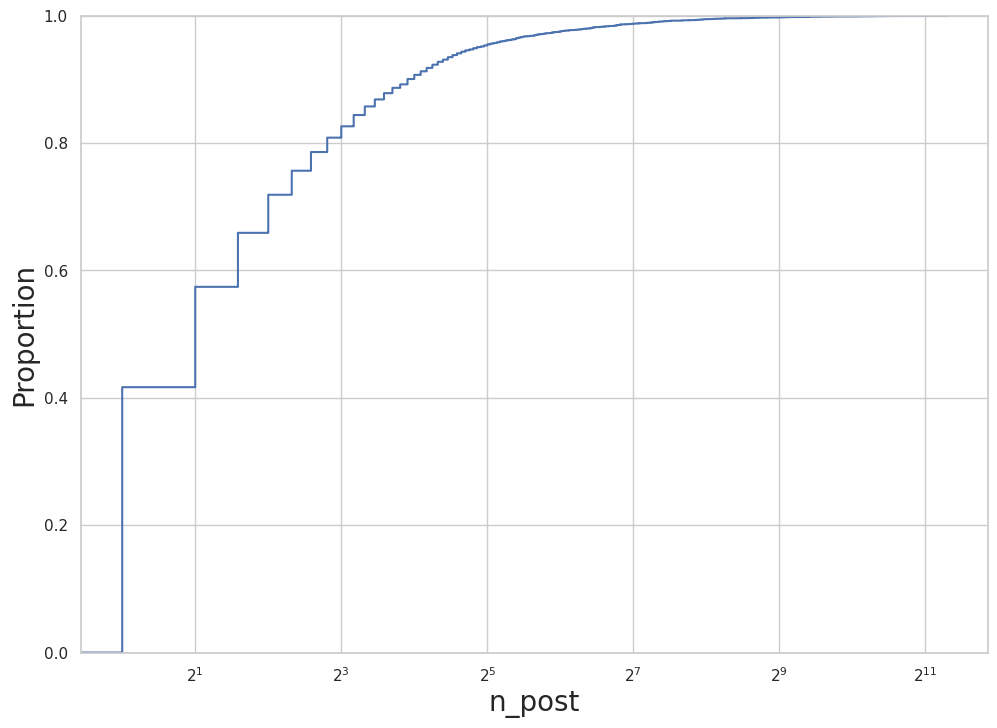

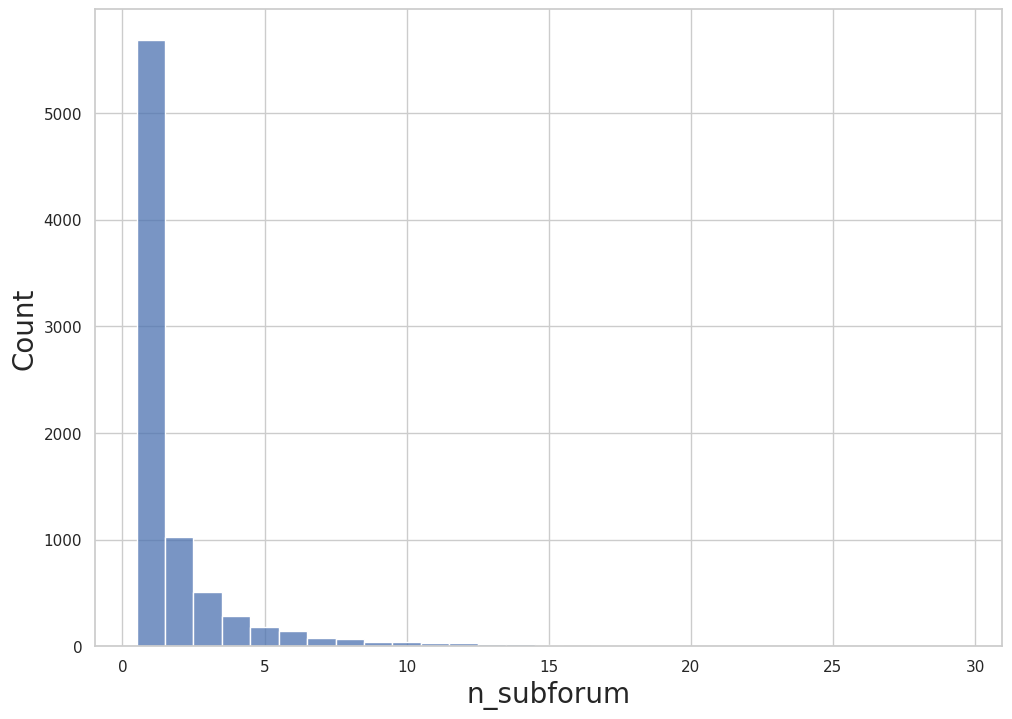

In [22]:
table = duckdb.read_json("/data/ccc/data/thehub_all.jsonl")
conn = duckdb.register("dread", table)
plot_config = PlotConfig(2, False, 30)
plots = basic_stats(conn, dread_config, plot_config)


***
## Reddit 2018 Jan

Num authors:  4413757
Num Posts:  82531775


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total subforums:  94945


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Authors with n_subforum above thresh (>= 100):  [('KaribouLouDied', 111), ('MegaAlex', 114), ('shit_poster9000', 109), ('gazongas001', 256), ('KennethMcCarthy', 129), ('PokWangpanmang', 115), ('IgnatiusPortabello', 102), ('SuperFLEB', 101), ('LouisSeaGays', 108), ('PrincessBananas85', 201), ('knowses', 103), ('joe579003', 103), ('InsertWitt', 104), ('Alias-_-Me', 107), ('octanemembrane_', 107), ('toeofcamell', 125), ('Jake0024', 100), ('ErikaLight', 122), ('MeatloafPopsicle', 101), ('MyStrangeUncles', 111), ('Zero_Ghost24', 115), ('only5cents', 185), ('heykevo', 139), ('madd74', 109), ('Victorian_Astronaut', 121), ('GetOffMyLawn_', 107), ('lydocia', 155), ('Sweet_Taurus0728', 131), ('TheMaStif', 103), ('NotTheOneYouNeed', 110), ('kjm1123490', 101), ('Swimmingindiamonds', 111), ('teuast', 113), ('Melechdaviid', 142), ('ThatOtherGuy_CA', 140), ('jahs_126', 120), ('trxbyx', 107), ('DigThatFunk', 103), ('Stompedyourhousewith', 116), ('congelar', 106), ('jppianoguy', 115), ('advertentlyvert

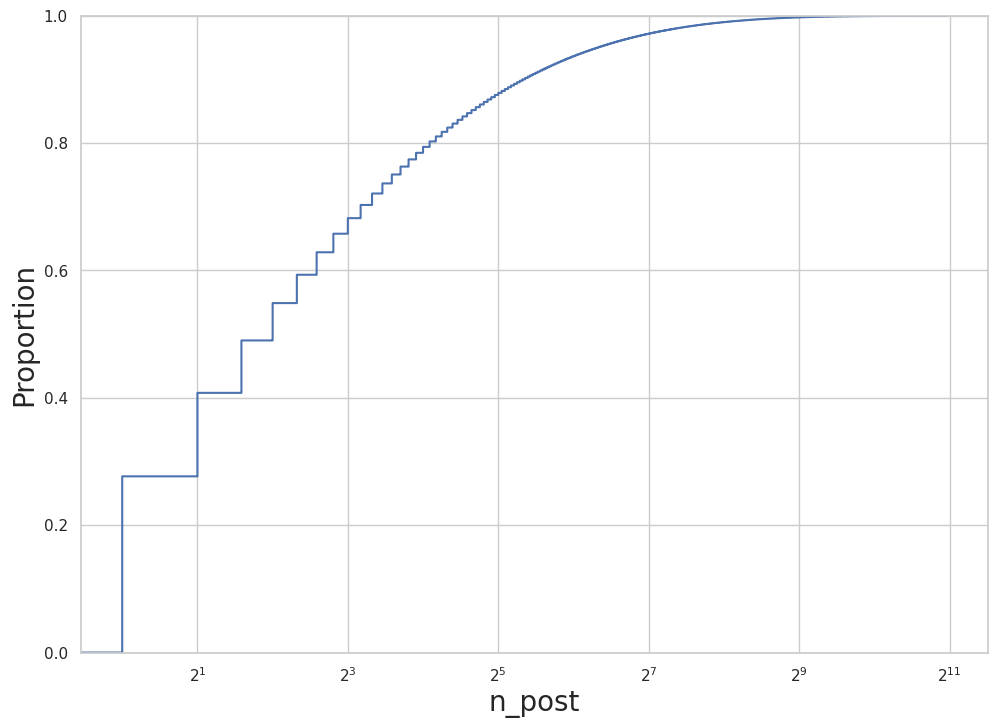

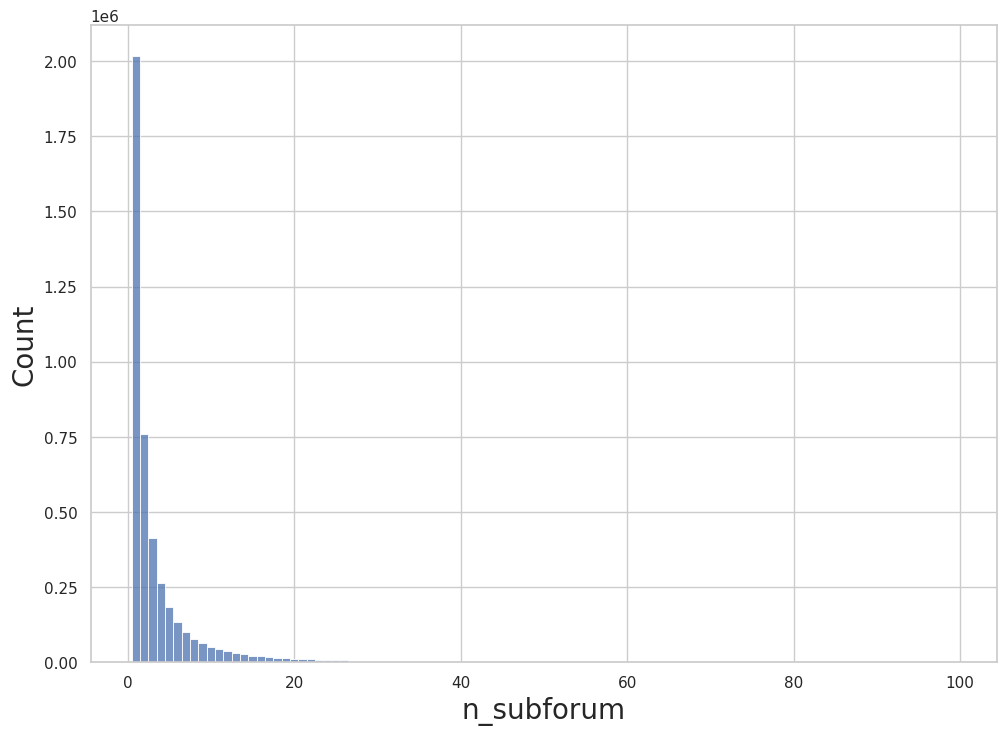

In [23]:
table = duckdb.read_json("/data/ccc/data/reddit_RC_2018_01")
conn = duckdb.register("reddit", table)
plot_config = PlotConfig(2, False, 100)
plots = basic_stats(conn, reddit_config, plot_config)

***
Reddit Dec 2019

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Num authors:  7439040


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Num Posts:  126992546


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Total subforums:  155864


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Authors with n_subforum above thresh (>= 100):  [('Team_Pluto', 108), ('Scoot_Ya_Boot', 103), ('jupiter711', 124), ('Soviet_Saiyan', 118), ('HOCK88_', 128), ('cubed_circle', 145), ('Gameknight6916', 117), ('InsidePerformer', 100), ('memedealer22', 130), ('fergus73', 113), ('WrenchFriessAlt', 113), ('slimjoel14', 124), ('Dazgil1234', 141), ('Pistolero921', 115), ('mattypg84', 120), ('toeofcamell', 136), ('SEND_BOOBS_PLEASE_', 102), ('Country_girl1992', 124), ('The1930s', 126), ('swyeary', 297), ('Wallyfrank', 117), ('Curious9125', 105), ('Zombiepixlz-gamr', 100), ('labman32', 290), ('DabIMON', 104), ('gratitudeuity', 143), ('DarkNite0w0', 106), ('deny_death', 104), ('JuanWithTheDeagle', 107), ('MasterVule', 106), ('QuietRains813', 108), ('redditspeedbot', 195), ('Beach_Kitten', 114), ('joe579003', 106), ('kinkyslc1', 134), ('themeatbridge', 120), ('Nuggetmilk51', 100), ('theghostofme', 119), ('jikkler', 103), ('iWillNotLetYouGo', 148), ('TheHoundsOFLove', 105), ('BeerJunky', 141), ('kb3

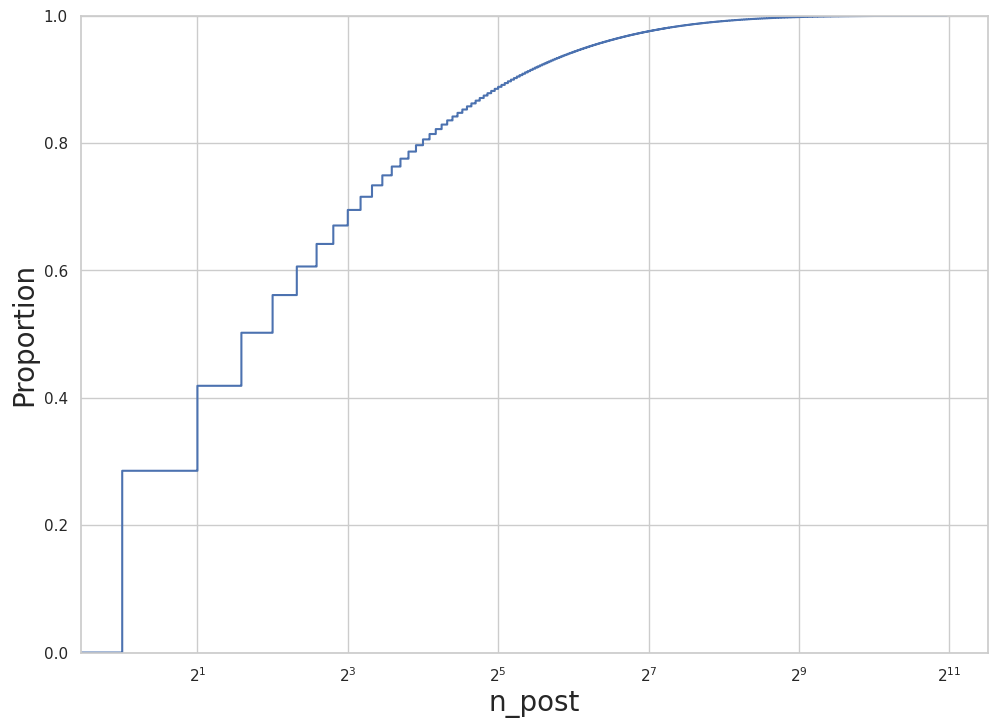

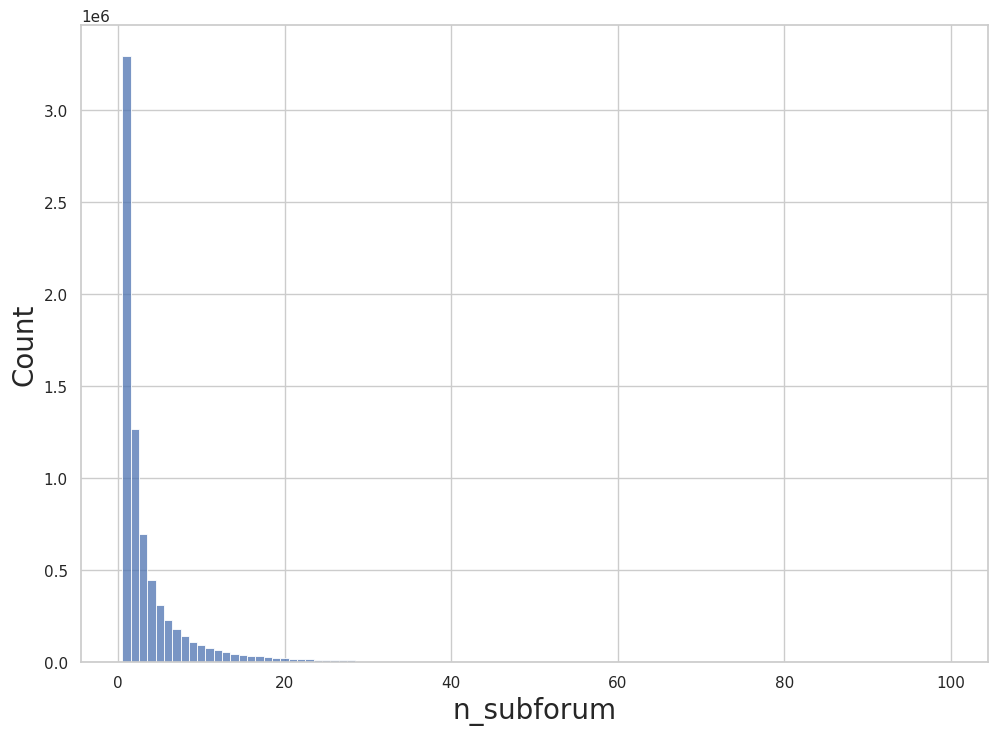

In [24]:
table = duckdb.read_json("/data/ccc/data/reddit_RC_2019_12")
conn = duckdb.register("reddit", table)
plot_config = PlotConfig(2, False, 100)
plots = basic_stats(conn, reddit_config, plot_config)

*** 
Dataset splits for each

In [21]:
# dread
table = duckdb.read_json("/data/ccc/data/dread_all.jsonl")
conn = duckdb.register("dread", table)
monthly_counts = duckdb.sql("SELECT year(to_timestamp(created_on)) as year, month(to_timestamp(created_on)) as month, COUNT(*) as n_post FROM \
                            (SELECT UNNEST(created_on) as created_on FROM dread) GROUP BY month, year ORDER BY year, month", connection=conn).df()

monthly_counts["c_post"] = monthly_counts["n_post"].cumsum()
total_count = monthly_counts["c_post"][len(monthly_counts)-1]


In [26]:
r_mid = bisect_left(monthly_counts["c_post"], total_count // 2)
train_count = monthly_counts["c_post"][r_mid - 1]
print("Mid point count:", train_count, " Total: ", total_count)
r_query = bisect_left(monthly_counts["c_post"], 3 * total_count // 4)
q_count = monthly_counts["c_post"][r_query] - train_count
t_count = total_count - q_count - train_count
print("Query: ", q_count, " Target: ", t_count)

Mid point count: 146171  Total:  294596
Query:  93557  Target:  54868


In [33]:
monthly_counts.iloc[r_mid]

year        2019
month          7
n_post     22485
c_post    168656
Name: 17, dtype: int64

In [32]:
datetime(2018,1,1).timestamp()

1514782800.0